<center><header><b>Red Wine Quality - Classification</b></header></center>

<b>Steps for Regression Modelling:</b>

1. <b>Business Problem Definition</b> - How to predict Red Wine Quality based on Attributes with defined factors
2. <b>Convert business problem</b> Into statistical problem  sales = F( attributes, product features, marketing info etc.)
3. <b>Finding the right technique</b> - Since it is predicting value (Classification Problem) problem so we can use OLS as one of the technique. We can also use other Machine Learning techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.

<b>Method Description</b>

<b>Step 1:</b> Data preprocessing: All features are made numerical using one-Hot-encoding. The features are scaled to avoid features with large values that may weigh too much in the results.

<b>Step 2:</b> Feature Selection: Eliminate redundant and irrelevant data by selecting a subset of relevant features that fully represents the given problem. Univariate feature selection with RFE & Seleck K Best . This analyzes each feature individually to detemine the strength of the relationship between the feature and labels. Using Weight of Evidence & VIF method to select features based on highest scores.

<b>Step 4:</b> Build the model: Decision tree model is built.

<b>Step 5:</b> Prediction & Evaluation (validation): Using the combined Test and Train data to make predictions of the model. Multiple scores are considered such as:accuracy score, recall, f-measure, confusion matrix using XGBoost,Adaptive Boosting ,Random Forest & Logistic Regression Models

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x216 with 0 Axes>

In [2]:
#import Data

Wine_Data = pd.read_csv('H:/Machine Learning/7. Kaggle - Competition Data/Red Wine Quality Indicator - Regression Problem/winequality-red.csv')

In [3]:
Wine_Data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Identifying Null Values

print(Wine_Data.isnull().sum())
print('Sum of Total Null Values is  {}'.format(sum(Wine_Data.isnull().sum())))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Sum of Total Null Values is  0


In [5]:
##Identifying Shape

Wine_Data.shape

(1599, 12)

In [6]:
Wine_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#Target Variable Value Count

Wine_Data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

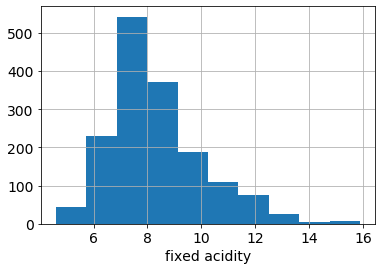

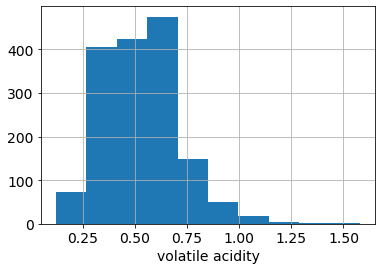

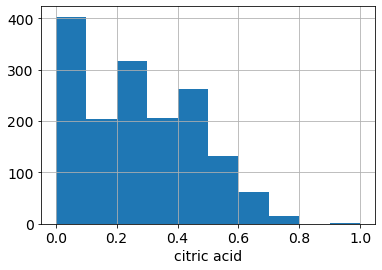

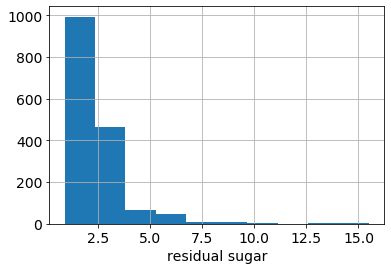

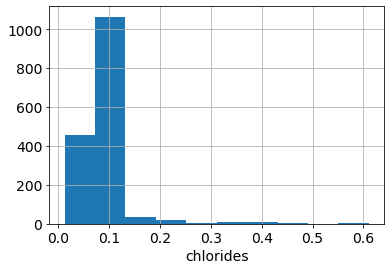

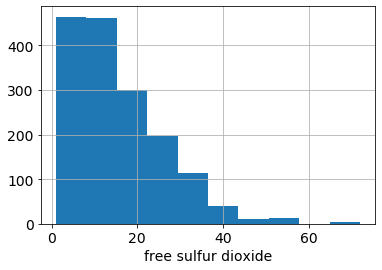

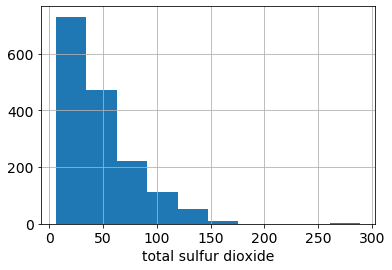

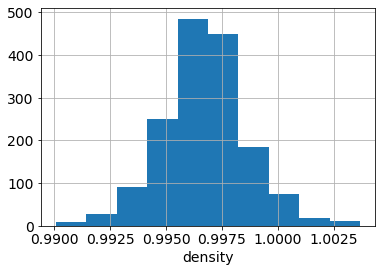

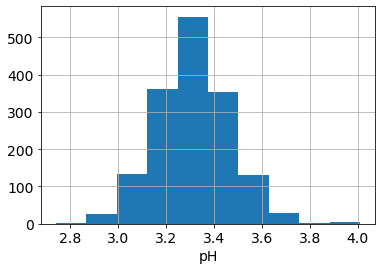

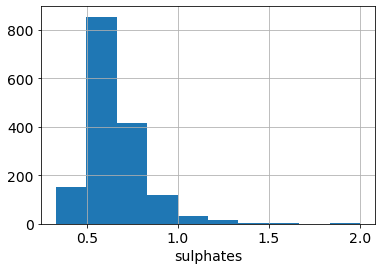

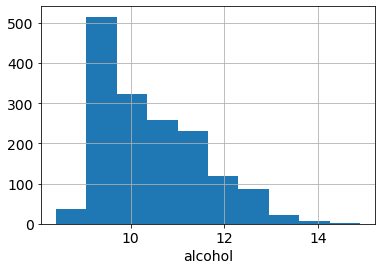

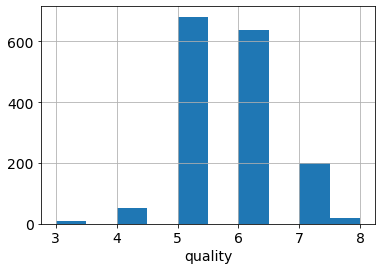

In [8]:
###Data Analysis using Bar Plot - Each Column in Bar Graph

for x in Wine_Data.columns:
    Wine_Data[x].hist()
    plt.xlabel(str(x))
    plt.show()



#### Observation - Using Bar Plot

As per Target Variable - we have more Quality ranges between 5 & 6 (Average Quality) and above 7 Next range (Good Quality)

In [28]:
#pandas profiling

pandas_profiling.ProfileReport(Wine_Data)

Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [29]:
### Dataset has 240 duplicate rows

In [9]:
##Target Variable

Wine_Data['quality'] = Wine_Data['quality'].apply(lambda x: 0 if x<7 else 1)

In [10]:
Wine_Data.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
Wine_Data.quality.value_counts()/Wine_Data.quality.count()

0    0.86429
1    0.13571
Name: quality, dtype: float64

### Data Visualization

Text(0.5, 1.0, 'Distribution of Wine Quality')

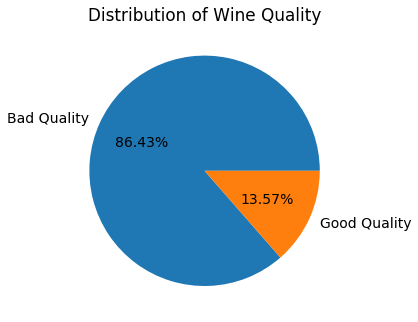

In [12]:
##Target Variable - Value Counts

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y_axis = [x for x in Wine_Data.quality.value_counts()]
ax.pie(y_axis,labels=['Bad Quality','Good Quality'],autopct='%1.2f%%')

ax.set_title("Distribution of Wine Quality")

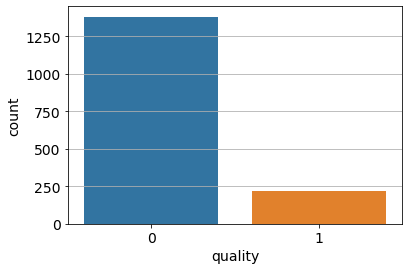

In [13]:
sns.countplot(x="quality", data=Wine_Data)
plt.show()

### Data Preparation

In [14]:
Wine_Data.groupby(by=['quality']).mean().reset_index()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037
1,1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049


In [15]:
# Creating Data audit Report

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_data =Wine_Data.apply(lambda x: var_summary(x)).T

In [16]:
num_data

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
fixed acidity,1599.0,0.0,13303.10000,8.319637,7.90000,1.741096,3.031416,4.60000,5.20000,6.100000,6.500000,7.1000,7.90000,9.200000,10.70000,11.8000,13.300000,15.90000
volatile acidity,1599.0,0.0,843.98500,0.527821,0.52000,0.179060,0.032062,0.12000,0.19000,0.270000,0.310000,0.3900,0.52000,0.640000,0.74500,0.8400,1.020000,1.58000
citric acid,1599.0,0.0,433.29000,0.270976,0.26000,0.194801,0.037947,0.00000,0.00000,0.000000,0.010000,0.0900,0.26000,0.420000,0.52200,0.6000,0.700200,1.00000
residual sugar,1599.0,0.0,4059.55000,2.538806,2.20000,1.409928,1.987897,0.90000,1.40000,1.590000,1.700000,1.9000,2.20000,2.600000,3.60000,5.1000,8.306000,15.50000
chlorides,1599.0,0.0,139.85900,0.087467,0.07900,0.047065,0.002215,0.01200,0.04298,0.054000,0.060000,0.0700,0.07900,0.090000,0.10900,0.1261,0.360160,0.61100
free sulfur dioxide,1599.0,0.0,25384.00000,15.874922,14.00000,10.460157,109.414884,1.00000,3.00000,4.000000,5.000000,7.0000,14.00000,21.000000,31.00000,35.0000,50.020000,72.00000
total sulfur dioxide,1599.0,0.0,74302.00000,46.467792,38.00000,32.895324,1082.102373,6.00000,8.00000,11.000000,14.000000,22.0000,38.00000,62.000000,93.20000,112.1000,145.000000,289.00000
density,1599.0,0.0,1593.79794,0.996747,0.99675,0.001887,0.000004,0.99007,0.99182,0.993598,0.994556,0.9956,0.99675,0.997835,0.99914,1.0000,1.001506,1.00369
pH,1599.0,0.0,5294.47000,3.311113,3.31000,0.154386,0.023835,2.74000,2.93000,3.060000,3.120000,3.2100,3.31000,3.400000,3.51000,3.5700,3.700200,4.01000
sulphates,1599.0,0.0,1052.38000,0.658149,0.62000,0.169507,0.028733,0.33000,0.42000,0.470000,0.500000,0.5500,0.62000,0.730000,0.85000,0.9300,1.260400,2.00000


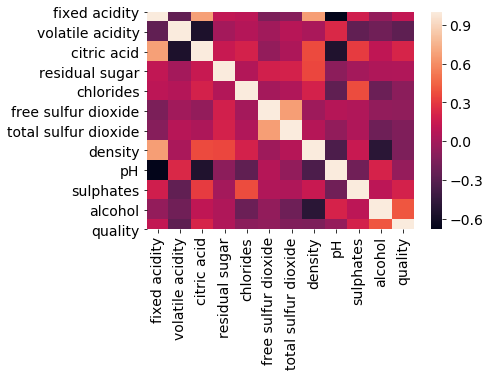

In [17]:
### visualize correlation matrix in Seaborn using a heatmap

sns.heatmap(Wine_Data.corr())

In [59]:
###Corr Relationship p>0.05

Corr_Data = Wine_Data.corr()
Corr_Data.to_csv('Corr_Data.csv')

In [18]:
##Changing Column Name 

Wine_Data.columns = [x.replace(' ','_') for x in Wine_Data.columns]

### variable reduction (feature selection/reduction)

- Univariate Regression
- WOE - Binomial classification
- RFE
- SelectKBest
- VIF
- PCA

#### Univariate Regression

In [19]:
somersd_df = pd.DataFrame()
for num_varaible in Wine_Data.columns.difference(['quality']):
    result = smf.logit(formula= str('quality~')+str(num_varaible),data=Wine_Data).fit()
    somers_d = 2 * metrics.roc_auc_score(Wine_Data.quality,result.predict())-1
    temp = pd.DataFrame([num_varaible,somers_d]).T
    temp.columns = ['VariableName','SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.321416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387599
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.374368
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.385605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390366
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.394334
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.395443
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.396095
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.380885
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.385390
  

In [20]:
imp_vars_SD = somersd_df.sort_values('SomersD', ascending=False).head(11)

In [21]:
imp_vars_SD

,VariableName,SomersD
0,alcohol,0.644981
0,volatile_acidity,0.490183
0,sulphates,0.477665
0,citric_acid,0.356433
0,total_sulfur_dioxide,0.289846
0,chlorides,0.264517
0,density,0.2548
0,fixed_acidity,0.209908
0,free_sulfur_dioxide,0.150006
0,pH,0.11217


In [22]:
imp_vars_somerceD = imp_vars_SD.VariableName

In [23]:
imp_vars_somerceD = list(imp_vars_somerceD)

#### RFE

In [24]:
X = Wine_Data[Wine_Data.columns.difference(['quality'])]

classifier = RandomForestClassifier()
rfe = RFE(classifier, 11)
rfe = rfe.fit(X, Wine_Data[['quality']] )

In [25]:
imp_vars_RFE = list(X.columns[rfe.support_])

In [26]:
imp_vars_RFE

['alcohol',
 'chlorides',
 'citric_acid',
 'density',
 'fixed_acidity',
 'free_sulfur_dioxide',
 'pH',
 'residual_sugar',
 'sulphates',
 'total_sulfur_dioxide',
 'volatile_acidity']

#### Select KBest

In [27]:
X = Wine_Data[Wine_Data.columns.difference(['quality'])]
SKB = SelectKBest(f_classif, k=11).fit(X, Wine_Data[['quality']] )

In [28]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [29]:
imp_vars_SKB

['alcohol',
 'chlorides',
 'citric_acid',
 'density',
 'fixed_acidity',
 'free_sulfur_dioxide',
 'pH',
 'residual_sugar',
 'sulphates',
 'total_sulfur_dioxide',
 'volatile_acidity']

In [30]:
Final_list = list(set(imp_vars_SKB + imp_vars_somerceD + imp_vars_RFE))

In [31]:
X = Wine_Data[Final_list]

#### Using WOE (Weight of Evidence)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

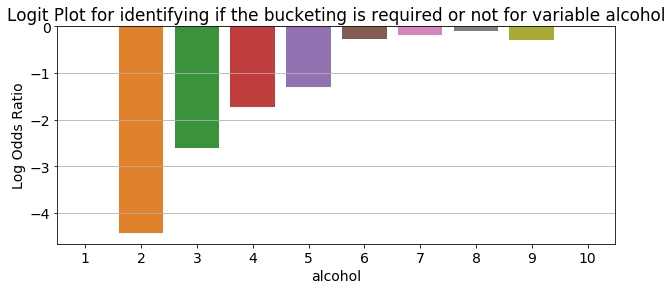

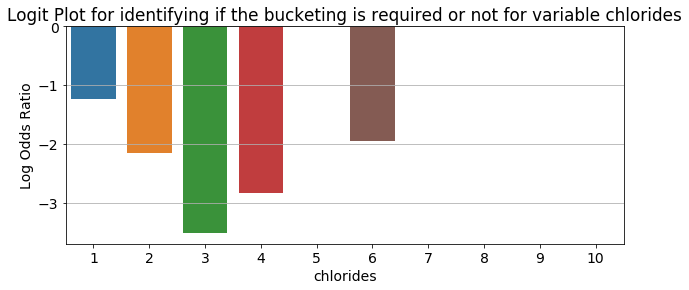

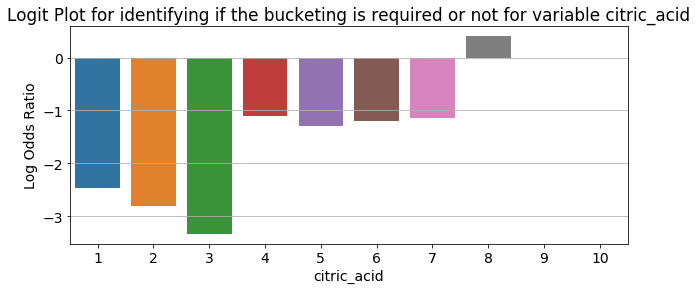

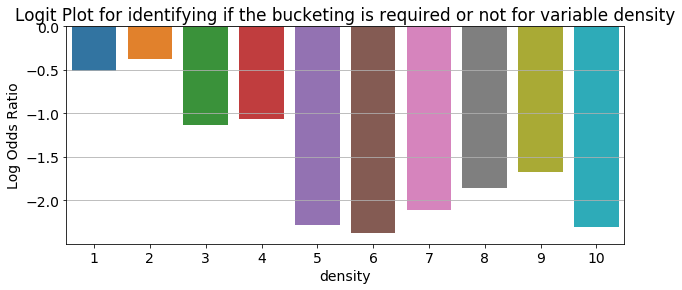

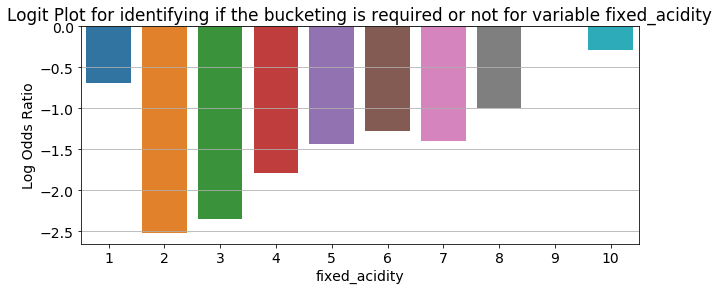

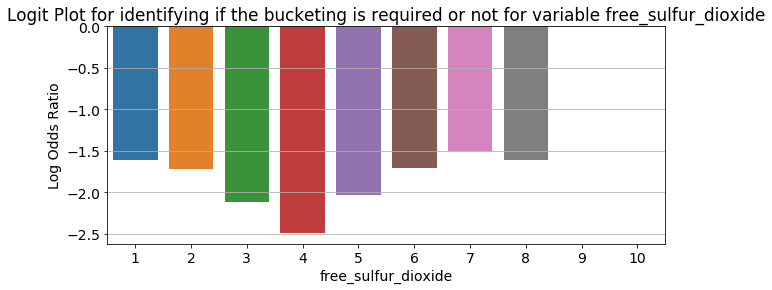

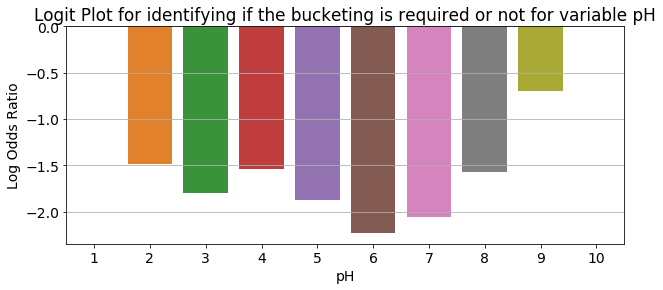

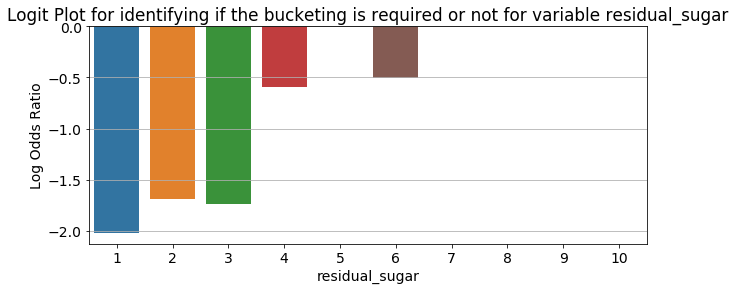

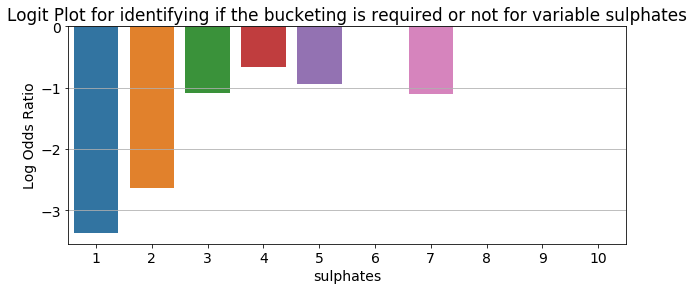

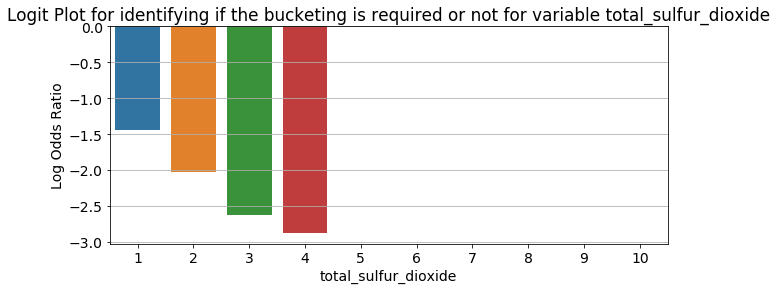

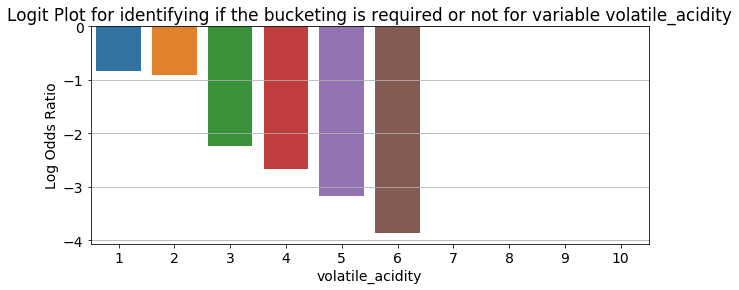

In [32]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in Wine_Data.columns.difference(['quality']):
    binned = pd.cut(Wine_Data[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = Wine_Data.groupby(binned)['quality'].sum() / (Wine_Data.groupby(binned)['quality'].count()-Wine_Data.groupby(binned)['quality'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [33]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [34]:
for col in Wine_Data.columns:
    if col == 'quality': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(Wine_Data, col, 'quality')
       # print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: fixed_acidity
IV score: 0.73


WoE and IV for column: volatile_acidity
IV score: 0.87


WoE and IV for column: citric_acid
IV score: 0.82


WoE and IV for column: residual_sugar
IV score: 0.37


WoE and IV for column: chlorides
IV score: 0.72


WoE and IV for column: free_sulfur_dioxide
IV score: 0.30


WoE and IV for column: total_sulfur_dioxide
IV score: 0.46


WoE and IV for column: density
IV score: 0.72


WoE and IV for column: pH
IV score: 0.42


WoE and IV for column: sulphates
IV score: 1.07


WoE and IV for column: alcohol
IV score: 1.36




 You can select the variables based on the information value and below criteria
 
 - IV: <0.02, Predictive Power: Useless for prediction
 - IV: 0.02 - 0.1, Predictive Power: Weak predictor
 - IV: 0.1 - 0.2, Predictive Power: Medium predictor
 - IV: 0.3 - 0.5, Predictive Power: Storng predictor
 - IV: > 0.5, Predictive Power: Suspecious predictor or too good predictor

### VIF - Variance Inflation Factor

In [35]:
vif = pd.DataFrame()

In [36]:
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [37]:
print(vif)

     VIF Factor              features
0     17.060026      volatile_acidity
1   1070.967685                    pH
2     74.452265         fixed_acidity
3     21.590621             sulphates
4      6.519699  total_sulfur_dioxide
5      6.442682   free_sulfur_dioxide
6    124.394866               alcohol
7   1479.287209               density
8      4.662992        residual_sugar
9      6.554877             chlorides
10     9.183495           citric_acid


#### Splitting the Data into Train and Test

In [38]:
target = Wine_Data[['quality']]
features = X

In [39]:
#Splitting the data for sklearn methods

train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [40]:
#for logistic regression using statsmodels

train, test = train_test_split(Wine_Data, test_size=0.5, random_state=0)

#### Model Building

#### Logistic Regression Using Stats Models (Traditional Approach)

In [41]:
logreg = smf.logit(formula='quality ~ chlorides + free_sulfur_dioxide + fixed_acidity + total_sulfur_dioxide + pH + residual_sugar + citric_acid + volatile_acidity + sulphates + density + alcohol', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.287942
         Iterations 9


In [42]:
print(result.summary2())

                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.339     
Dependent Variable:     quality            AIC:                484.1310  
Date:                   2020-12-01 15:33   BIC:                540.3314  
No. Observations:       799                Log-Likelihood:     -230.07   
Df Model:               11                 LL-Null:            -348.23   
Df Residuals:           787                LLR p-value:        2.0238e-44
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         9.0000                                           
-------------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-------------------------------------------------------------------------
Intercept             364.7469 148.9823  2.4483 0.0144   72.7471 656.7468
chlorides              -7.5310   3.7760 -1.9944 0.0461  -14.9317  -0

#### Accuracy Metrics

In [43]:
train_gini = 2 * metrics.roc_auc_score(train['quality'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2 * metrics.roc_auc_score(test['quality'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['quality'], result.predict(train))
test_auc = metrics.roc_auc_score(test['quality'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)                                 

The Gini Index for the model built on the Train Data is :  0.7817637208424726
The Gini Index for the model built on the Test Data is :  0.737534679706753
The AUC for the model built on the Train Data is :  0.8908818604212363
The AUC for the model built on the Test Data is :  0.8687673398533765


In [44]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's - Train

train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['quality']

# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
523,0,0.012978
626,0,0.009307
495,1,0.368062
1270,0,0.858138
155,0,0.076149


In [45]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's - Test

test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['quality']

# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
1109,0,0.077823
1032,0,0.009224
1002,1,0.697487
487,0,0.023058
979,0,0.279033


In [46]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity

roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [47]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.157697
0,0.020408,1.000000,0.347697,0.450563
0,0.040816,0.960317,0.524517,0.593242
0,0.061224,0.928571,0.618128,0.667084
0,0.081633,0.896825,0.683507,0.717146


In [48]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [49]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.157697,1.000000
0,0.020408,1.000000,0.347697,0.450563,1.347697
0,0.040816,0.960317,0.524517,0.593242,1.484835
0,0.061224,0.928571,0.618128,0.667084,1.546699
0,0.081633,0.896825,0.683507,0.717146,1.580332


In [50]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off

roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.183673,0.809524,0.82318,0.821026,1.632704


In [51]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off

roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.428571,0.547619,0.945022,0.882353,1.492641


In [52]:
#Cut-off based on highest sensitivity

roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.0,0.000000,0.157697,1.000000
0,0.020408,1.0,0.347697,0.450563,1.347697


In [53]:
#Choosen Best Cut-off is 0.53 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.183673 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.183673 else 0)

In [54]:
train_predict.head()

,actual,prob,predicted
523,0,0.012978,0
626,0,0.009307,0
495,1,0.368062,1
1270,0,0.858138,1
155,0,0.076149,0


In [55]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.8210262828535669
The overall accuracy score for the Test Data  is :  0.79125


In [56]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       673
           1       0.46      0.81      0.59       126

    accuracy                           0.82       799
   macro avg       0.71      0.82      0.74       799
weighted avg       0.88      0.82      0.84       799



In [57]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       709
           1       0.33      0.81      0.47        91

    accuracy                           0.79       800
   macro avg       0.65      0.80      0.67       800
weighted avg       0.90      0.79      0.82       800



In [58]:
### Decile Analysis

#Decile analysis
#Top-two deciles - High risk (Low Quality Wine) - will reject 
#3rd,4th, 5th deciles - medium risk (Medium Quality Wine) - will accept wine with proper quality
#6th decile onwards - low risk Wine - accept the Wine


#Decile analysis for validation of models - Business validation

In [59]:
train_predict['Deciles'] = pd.qcut(train_predict['prob'],10,labels=False)

In [60]:
train_predict.head()

,actual,prob,predicted,Deciles
523,0,0.012978,0,2
626,0,0.009307,0,1
495,1,0.368062,1,8
1270,0,0.858138,1,9
155,0,0.076149,0,5


In [61]:
test_predict['Deciles'] = pd.qcut(test_predict['prob'],10,labels=False)
test_predict.head()

,actual,prob,predicted,Deciles
1109,0,0.077823,0,5
1032,0,0.009224,0,1
1002,1,0.697487,1,9
487,0,0.023058,0,3
979,0,0.279033,1,8


In [62]:
# Decile Analysis for train data

no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [63]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train.reset_index()

,Deciles,prob,prob,actual,actual,actual
0,9,0.992558,0.512698,49,31,80
1,8,0.510657,0.326738,38,42,80
2,7,0.325481,0.167216,15,65,80
3,6,0.166185,0.087525,11,69,80
4,5,0.086794,0.054016,6,73,79
5,4,0.053961,0.030900,5,75,80
6,3,0.030894,0.021195,2,77,79
7,2,0.021066,0.012005,0,80,80
8,1,0.011934,0.008196,0,81,81
9,0,0.008140,0.000531,0,80,80


In [64]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test.reset_index()

,Deciles,prob,prob,actual,actual,actual
0,9,0.889302,0.493019,39,41,80
1,8,0.491684,0.277868,19,61,80
2,7,0.275868,0.167216,17,63,80
3,6,0.166951,0.094112,8,72,80
4,5,0.093876,0.055783,5,75,80
5,4,0.055076,0.032948,0,80,80
6,3,0.032836,0.022600,2,77,79
7,2,0.022552,0.015476,0,81,81
8,1,0.015359,0.008813,1,79,80
9,0,0.008777,0.000471,0,80,80


#### 1. Logistic Regression using SkLearn

In [65]:
model = LogisticRegression()
model_Reg = model.fit(train_X,train_y)

In [66]:
train_X['pred_prob'] = pd.DataFrame(model_Reg.predict_proba(train_X), index=train_X.index)[1]
test_X['pred_prob'] = pd.DataFrame(model_Reg.predict_proba(test_X),index=test_X.index)[1]

In [67]:
train = pd.concat([train_X, train_y], axis=1)
test  = pd.concat([test_X,test_y],axis=1)

In [68]:
train['pred'] = np.where(train.pred_prob>0.183673, 1,0)
test['pred'] = np.where(test.pred_prob>0.183673, 1,0)

In [69]:
train.head(4)

,volatile_acidity,pH,fixed_acidity,sulphates,total_sulfur_dioxide,free_sulfur_dioxide,alcohol,density,residual_sugar,chlorides,citric_acid,pred_prob,quality,pred
374,0.410,3.01,14.0,0.81,47.0,6.0,10.800000,1.00140,3.8,0.089,0.63,0.219837,0,1
800,0.610,3.25,7.2,0.51,108.0,26.0,9.400000,0.99641,4.0,0.082,0.08,0.010463,0,0
1441,0.785,3.16,7.4,0.52,98.0,19.0,9.566667,0.99713,5.2,0.094,0.19,0.013093,0,0
1269,0.490,3.50,5.5,0.82,87.0,28.0,14.000000,0.99080,1.8,0.044,0.03,0.510468,1,1


In [70]:
test.head(4)

,volatile_acidity,pH,fixed_acidity,sulphates,total_sulfur_dioxide,free_sulfur_dioxide,alcohol,density,residual_sugar,chlorides,citric_acid,pred_prob,quality,pred
912,0.46,3.33,10.0,0.62,8.0,4.0,12.2,0.99674,2.9,0.065,0.44,0.435872,0,1
772,0.57,3.27,9.5,0.55,144.0,23.0,9.4,0.99782,2.3,0.082,0.27,0.004826,0,0
1037,0.91,3.35,7.3,0.56,56.0,20.0,9.2,0.99672,1.8,0.074,0.10,0.006451,0,0
1106,0.23,3.21,8.2,0.54,17.0,9.0,12.3,0.99376,1.9,0.069,0.42,0.618326,0,1


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train.quality, train.pred)
print(confusion_matrix)

[[792 173]
 [ 46 108]]


In [72]:
print(metrics.classification_report(train.quality, train.pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       965
           1       0.38      0.70      0.50       154

    accuracy                           0.80      1119
   macro avg       0.66      0.76      0.69      1119
weighted avg       0.87      0.80      0.83      1119



In [73]:
print(metrics.classification_report(test.quality, test.pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       417
           1       0.39      0.75      0.51        63

    accuracy                           0.81       480
   macro avg       0.67      0.78      0.70       480
weighted avg       0.88      0.81      0.84       480



#### K-nearest Neighbours

In [74]:
sc = StandardScaler()

In [75]:
std_data_train = pd.DataFrame(sc.fit_transform(train_X), columns=train_X.columns, index = train_X.index )

In [76]:
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [77]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7],
              'weights': ['uniform', 'distance']}

model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model_KNN = model.fit(std_data_train, train_y)

In [78]:
model_KNN.best_score_

0.8881351402717423

In [79]:
model_KNN.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [80]:
train_pred = model_KNN.predict(std_data_train)
test_pred  = model_KNN.predict(std_data_test)

In [81]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00      1.00       154

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



In [82]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       417
           1       0.60      0.59      0.59        63

    accuracy                           0.89       480
   macro avg       0.77      0.76      0.77       480
weighted avg       0.89      0.89      0.89       480



#### Decision Tree Classifier

In [83]:
train_X = train_X[train_X.columns.difference(['pred_prob'])]
test_X = test_X[test_X.columns.difference(['pred_prob'])]

In [84]:
param_grid = {'max_depth':np.arange(2,5),
              'max_features':np.arange(2,5)}

In [85]:
tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,n_jobs=-1)
tree.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4]),
                         'max_features': array([2, 3, 4])},
             pre_dispa

In [86]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
tree.best_score_

0.8757819481680071

In [88]:
tree.best_params_

{'max_depth': 4, 'max_features': 3}

#### Decision Tree- Classification Report

In [89]:
train_pred = tree.predict(train_X)
test_pred  = tree.predict(test_X)

In [90]:
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       965
           1       0.73      0.41      0.53       154

    accuracy                           0.90      1119
   macro avg       0.82      0.69      0.73      1119
weighted avg       0.89      0.90      0.89      1119



In [91]:
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       417
           1       0.62      0.40      0.49        63

    accuracy                           0.89       480
   macro avg       0.77      0.68      0.71       480
weighted avg       0.88      0.89      0.88       480



#### Final Decision Tree Model

In [92]:
train_X = train_X[train_X.columns.difference(['pred_prob'])]

In [93]:
clf_tree = DecisionTreeClassifier( max_depth = 3, max_features=3, max_leaf_nodes=5 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [94]:
##ROC Curve - Using Decision Tree

print(metrics.classification_report(train_y, clf_tree.predict(train_X)))
print(metrics.classification_report(test_y, clf_tree.predict(test_X)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       965
           1       0.65      0.34      0.45       154

    accuracy                           0.88      1119
   macro avg       0.77      0.66      0.69      1119
weighted avg       0.87      0.88      0.87      1119

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       417
           1       0.69      0.35      0.46        63

    accuracy                           0.89       480
   macro avg       0.80      0.66      0.70       480
weighted avg       0.88      0.89      0.88       480



In [95]:
clf_tree.feature_importances_

array([0.63025048, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.26062083, 0.        ,
       0.10912869])

In [96]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, clf_tree.feature_importances_)]

feature_map

[('alcohol', 0.6302504802978692),
 ('chlorides', 0.0),
 ('citric_acid', 0.0),
 ('density', 0.0),
 ('fixed_acidity', 0.0),
 ('free_sulfur_dioxide', 0.0),
 ('pH', 0.0),
 ('residual_sugar', 0.0),
 ('sulphates', 0.26062083239710576),
 ('total_sulfur_dioxide', 0.0),
 ('volatile_acidity', 0.10912868730502497)]

In [97]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(30)

,Feature,importance
0,alcohol,0.630250
8,sulphates,0.260621
10,volatile_acidity,0.109129
1,chlorides,0.000000
2,citric_acid,0.000000
3,density,0.000000
4,fixed_acidity,0.000000
5,free_sulfur_dioxide,0.000000
6,pH,0.000000
7,residual_sugar,0.000000


#### XG Boost Classifier

In [98]:
from xgboost import XGBClassifier

In [99]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [100]:
xgb_estimator.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpa=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method=None, validate_parameters=False, verbose=1,
              verbosity=None)

In [101]:
print(metrics.classification_report(train_y,xgb_estimator.predict(train_X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.99      0.93      0.96       154

    accuracy                           0.99      1119
   macro avg       0.99      0.96      0.98      1119
weighted avg       0.99      0.99      0.99      1119



In [102]:
print(metrics.classification_report(test_y,xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       417
           1       0.85      0.54      0.66        63

    accuracy                           0.93       480
   macro avg       0.89      0.76      0.81       480
weighted avg       0.92      0.93      0.92       480



In [103]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

0.999468407240428
0.9295420806212173


#### Naive Bayes Classifier

In [104]:
Nb_Clf = GaussianNB()
Nb_Clf.fit(train_X,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [105]:
metrics.accuracy_score(train_y,Nb_Clf.predict(train_X))

0.8471849865951743

In [106]:
print(metrics.classification_report(train_y,Nb_Clf.predict(train_X)))
print(metrics.classification_report(test_y,Nb_Clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       965
           1       0.46      0.69      0.55       154

    accuracy                           0.85      1119
   macro avg       0.70      0.78      0.73      1119
weighted avg       0.88      0.85      0.86      1119

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       417
           1       0.44      0.68      0.53        63

    accuracy                           0.84       480
   macro avg       0.69      0.78      0.72       480
weighted avg       0.88      0.84      0.86       480



In [108]:
clf_tree.predict([[1.99,1.99,1.99,1.99,1.99,1.99,2.33,1.99,1.99,1.33,1.99]])

array([0], dtype=int64)

In [109]:
import pickle

In [110]:
pickle_out = open('Wine_Prediction.pkl','wb')
pickle.dump(clf_tree,pickle_out)
pickle_out.close()

In [111]:
Wine_Data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [112]:
Wine_Data.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
